# Python Tutorial 7: Graph Theory with NetworkX

## Graph Theory - Method 2: Directed Graph and Undirected Graph Using NetworkX

### Author: Dr. Owen Chen

### Date: 2023/4/30


## NetworkX 

https://networkx.org/documentation/stable/index.html


In [ ]:
# install these dependent packages:
!pip install numpy
!pip install matplotlib
!pip install networkx

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [81]:
draw_options = {
    'node_color': 'Blue',
    'node_size': 500,
    'font_color': 'w',    
    'width': 2,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}

def describe_graph(G, draw=True, draw_options=draw_options):
    nodes = [node for node in G.nodes()]
    print("Nodes:", nodes)
    edges =  [edge for edge in G.edges()]
    print("Edges:", edges)
    adjmat = np.matrix(nx.adjacency_matrix(G).todense())    
    print("adjacency_matrix:")
    print(adjmat)
    
    # Check number of paths with length of i
    for i in range(2, 5):
        adjmat_i = adjmat**i
        print(f"adjacency_matrix^{i}:")
        print(adjmat_i)
        print(f"Number of paths of length {i}:", np.sum(adjmat_i))
        print("-"*20)

    # Check cycles
    if nx.is_directed_acyclic_graph(G):
        print("No cycle in the graph")
    else:    
        # Detect number of cycles in the graph
        cycles = list(nx.simple_cycles(G))
        print(f"There are {len(cycles)} cycles in the graph:")
        for cycle in cycles:
            print(cycle)

    #Draw the graph
    if draw:
        nx.draw_networkx(G, arrows=True, **draw_options)
        plt.show()
            

## Example 1: A Directed Graph of 4 Nodes
Use 0 to n-1 as node labels

In [82]:
# Create a graph
graph = nx.DiGraph()
n = 4
graph.add_nodes_from(range(n))
graph.add_edges_from([(i, i+1) for i in range(n-1)])
graph.add_edges_from([(i, i+2) for i in range(n-2)])

Nodes: [0, 1, 2, 3]
Edges: [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3)]
adjacency_matrix:
[[0 1 1 0]
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 0]]
adjacency_matrix^2:
[[0 0 1 2]
 [0 0 0 1]
 [0 0 0 0]
 [0 0 0 0]]
Number of paths of length 2: 4
--------------------
adjacency_matrix^3:
[[0 0 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Number of paths of length 3: 1
--------------------
adjacency_matrix^4:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Number of paths of length 4: 0
--------------------
No cycle in the graph


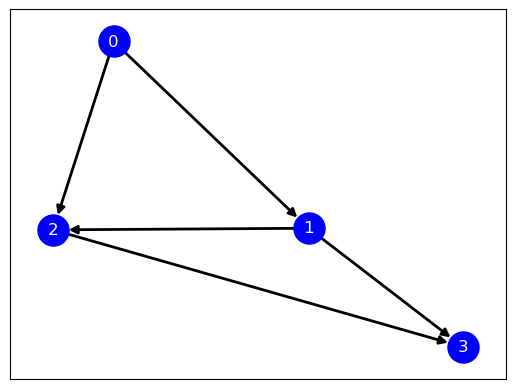

In [83]:
describe_graph(graph)

## Example 2 - Use Letters as Node Labels

In [84]:
# add the edges to the graph
g2 = nx.DiGraph()
g2.add_edge('a','b')
g2.add_edge('a','c')
g2.add_edge('a','d')
g2.add_edge('b','c')
g2.add_edge('b','d')
g2.add_edge('c','d')
g2.add_edge('c','e')
g2.add_edge('d','e')

Nodes: ['a', 'b', 'c', 'd', 'e']
Edges: [('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'c'), ('b', 'd'), ('c', 'd'), ('c', 'e'), ('d', 'e')]
adjacency_matrix:
[[0 1 1 1 0]
 [0 0 1 1 0]
 [0 0 0 1 1]
 [0 0 0 0 1]
 [0 0 0 0 0]]
adjacency_matrix^2:
[[0 0 1 2 2]
 [0 0 0 1 2]
 [0 0 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Number of paths of length 2: 9
--------------------
adjacency_matrix^3:
[[0 0 0 1 3]
 [0 0 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Number of paths of length 3: 5
--------------------
adjacency_matrix^4:
[[0 0 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Number of paths of length 4: 1
--------------------
No cycle in the graph


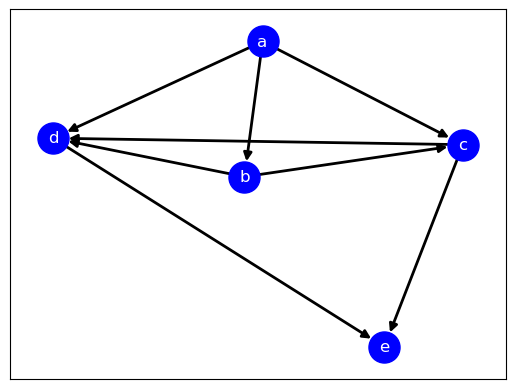

In [85]:
describe_graph(g2)

## Use Networkx graph for ACSL Problems

## ACSL 2021-2022 Contest 4 Short Problems -  Junior Division

![](./img/acsl_2022_contest4_jr.png)


### Problem 1 - Graph Theory
Given vertices {A, B, C, D, E} and edges {AE, AB, BD, BA, CD, DC, BE,
EC, CA}, how many paths of length 2 are there?

In [86]:
G1 = nx.DiGraph()
G1.add_nodes_from(list('ABCDE'))
G1.add_edges_from([('A', 'E'), 
                  ('A','B'), 
                  ('B','D'),
                  ('B','A'), 
                  ('C','D'), 
                  ('D','C'), 
                  ('B','E'),
                  ('E','C'),
                  ('C','A'),
                 ])

Nodes: ['A', 'B', 'C', 'D', 'E']
Edges: [('A', 'E'), ('A', 'B'), ('B', 'D'), ('B', 'A'), ('B', 'E'), ('C', 'D'), ('C', 'A'), ('D', 'C'), ('E', 'C')]
adjacency_matrix:
[[0 1 0 0 1]
 [1 0 0 1 1]
 [1 0 0 1 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]
adjacency_matrix^2:
[[1 0 1 1 1]
 [0 1 2 0 1]
 [0 1 1 0 1]
 [1 0 0 1 0]
 [1 0 0 1 0]]
Number of paths of length 2: 15
--------------------
adjacency_matrix^3:
[[1 1 2 1 1]
 [3 0 1 3 1]
 [2 0 1 2 1]
 [0 1 1 0 1]
 [0 1 1 0 1]]
Number of paths of length 3: 26
--------------------
adjacency_matrix^4:
[[3 1 2 3 2]
 [1 3 4 1 3]
 [1 2 3 1 2]
 [2 0 1 2 1]
 [2 0 1 2 1]]
Number of paths of length 4: 44
--------------------
There are 5 cycles in the graph:
['A', 'B', 'E', 'C']
['A', 'B']
['A', 'B', 'D', 'C']
['A', 'E', 'C']
['C', 'D']


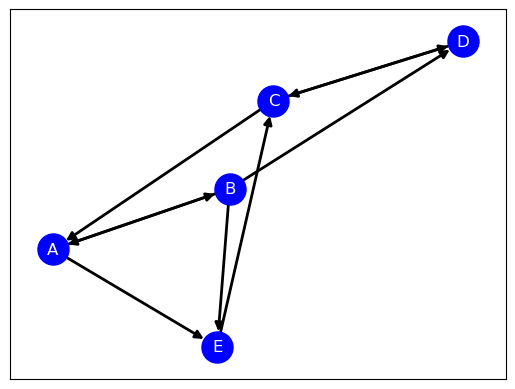

In [87]:
describe_graph(G1)

## Problem 2 - Graphy Theory
How man cycles are there from A in the directed graph below?


In [88]:
G2 = nx.DiGraph()
G2.add_nodes_from(list('ABCD'))
G2.add_edges_from([('A', 'B'), 
                  ('A','D'), 
                  ('B','A'),
                  ('B','C'), 
                  ('C','A'), 
                  ('D','A'), 
                  ('D','C'),
                 ])

Nodes: ['A', 'B', 'C', 'D']
Edges: [('A', 'B'), ('A', 'D'), ('B', 'A'), ('B', 'C'), ('C', 'A'), ('D', 'A'), ('D', 'C')]
adjacency_matrix:
[[0 1 0 1]
 [1 0 1 0]
 [1 0 0 0]
 [1 0 1 0]]
adjacency_matrix^2:
[[2 0 2 0]
 [1 1 0 1]
 [0 1 0 1]
 [1 1 0 1]]
Number of paths of length 2: 12
--------------------
adjacency_matrix^3:
[[2 2 0 2]
 [2 1 2 1]
 [2 0 2 0]
 [2 1 2 1]]
Number of paths of length 3: 22
--------------------
adjacency_matrix^4:
[[4 2 4 2]
 [4 2 2 2]
 [2 2 0 2]
 [4 2 2 2]]
Number of paths of length 4: 38
--------------------
There are 4 cycles in the graph:
['C', 'A', 'D']
['C', 'A', 'B']
['B', 'A']
['A', 'D']


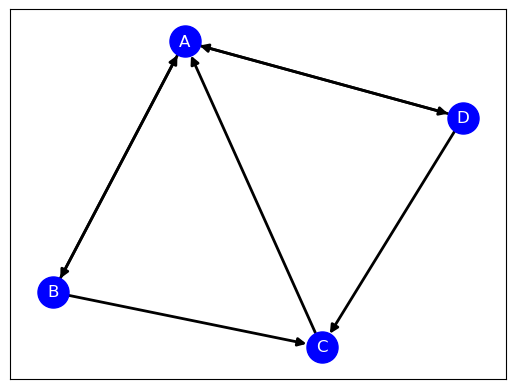

In [89]:
describe_graph(G2)

## ACSL 2021-2022 Contest 4 Short Problems -  Intermediate Division

![](./img/acsl_2022_contest4_int.png)


### Problem 1 - Graph Theory
Given a directed graph with vertices {A, B, C, D} and edges {AB, CB, AD,
BC, BD, AC}, if edge DC were added, how many more paths of length 2
would there be?

In [91]:
G1 = nx.DiGraph()
G1.add_nodes_from(list('ABCD'))
G1.add_edges_from([('A','B'),
                   ('C','B'),
                   ('A','D'),
                   ('B','C'),
                   ('B','D'),
                   ('A','C'),
                  ])

Nodes: ['A', 'B', 'C', 'D']
Edges: [('A', 'B'), ('A', 'D'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'B')]
adjacency_matrix:
[[0 1 1 1]
 [0 0 1 1]
 [0 1 0 0]
 [0 0 0 0]]
adjacency_matrix^2:
[[0 1 1 1]
 [0 1 0 0]
 [0 0 1 1]
 [0 0 0 0]]
Number of paths of length 2: 6
--------------------
adjacency_matrix^3:
[[0 1 1 1]
 [0 0 1 1]
 [0 1 0 0]
 [0 0 0 0]]
Number of paths of length 3: 6
--------------------
adjacency_matrix^4:
[[0 1 1 1]
 [0 1 0 0]
 [0 0 1 1]
 [0 0 0 0]]
Number of paths of length 4: 6
--------------------
There are 1 cycles in the graph:
['C', 'B']


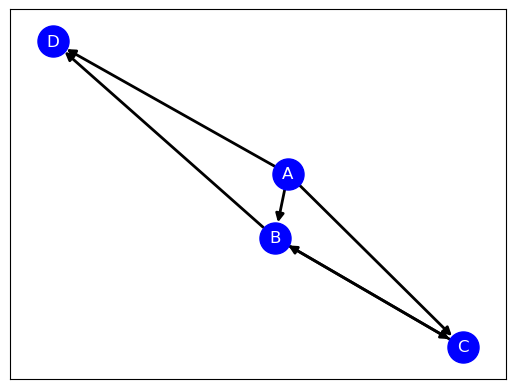

In [92]:
describe_graph(G1)

Nodes: ['A', 'B', 'C', 'D']
Edges: [('A', 'B'), ('A', 'D'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'B'), ('D', 'C')]
adjacency_matrix:
[[0 1 1 1]
 [0 0 1 1]
 [0 1 0 0]
 [0 0 1 0]]
adjacency_matrix^2:
[[0 1 2 1]
 [0 1 1 0]
 [0 0 1 1]
 [0 1 0 0]]
Number of paths of length 2: 9
--------------------
adjacency_matrix^3:
[[0 2 2 1]
 [0 1 1 1]
 [0 1 1 0]
 [0 0 1 1]]
Number of paths of length 3: 12
--------------------
adjacency_matrix^4:
[[0 2 3 2]
 [0 1 2 1]
 [0 1 1 1]
 [0 1 1 0]]
Number of paths of length 4: 16
--------------------
There are 2 cycles in the graph:
['C', 'B', 'D']
['C', 'B']


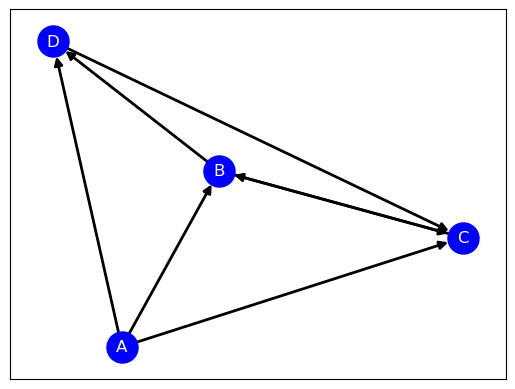

In [94]:
# Add another edge DC
G1.add_edge('D','C')
describe_graph(G1)

- So additional paths of length 2 is 9-6 = 3.
- The answer is 3

### Problem 2 - Graph Theory
How many cycles of length 4 are there from A?

Nodes: ['A', 'B', 'C', 'D', 'E', 'F']
Edges: [('A', 'D'), ('A', 'F'), ('B', 'A'), ('B', 'C'), ('B', 'E'), ('C', 'D'), ('C', 'F'), ('D', 'A'), ('E', 'B'), ('E', 'D'), ('F', 'C'), ('F', 'E')]
adjacency_matrix:
[[0 0 0 1 0 1]
 [1 0 1 0 1 0]
 [0 0 0 1 0 1]
 [1 0 0 0 0 0]
 [0 1 0 1 0 0]
 [0 0 1 0 1 0]]
adjacency_matrix^2:
[[1 0 1 0 1 0]
 [0 1 0 3 0 2]
 [1 0 1 0 1 0]
 [0 0 0 1 0 1]
 [2 0 1 0 1 0]
 [0 1 0 2 0 1]]
Number of paths of length 2: 22
--------------------
adjacency_matrix^3:
[[0 1 0 3 0 2]
 [4 0 3 0 3 0]
 [0 1 0 3 0 2]
 [1 0 1 0 1 0]
 [0 1 0 4 0 3]
 [3 0 2 0 2 0]]
Number of paths of length 3: 40
--------------------
adjacency_matrix^4:
[[ 4  0  3  0  3  0]
 [ 0  3  0 10  0  7]
 [ 4  0  3  0  3  0]
 [ 0  1  0  3  0  2]
 [ 5  0  4  0  4  0]
 [ 0  2  0  7  0  5]]
Number of paths of length 4: 73
--------------------
There are 8 cycles in the graph:
['A', 'F', 'E', 'D']
['A', 'F', 'E', 'B', 'C', 'D']
['A', 'F', 'E', 'B']
['A', 'F', 'C', 'D']
['A', 'D']
['F', 'E', 'B', 'C']
['F', 'C']
['B

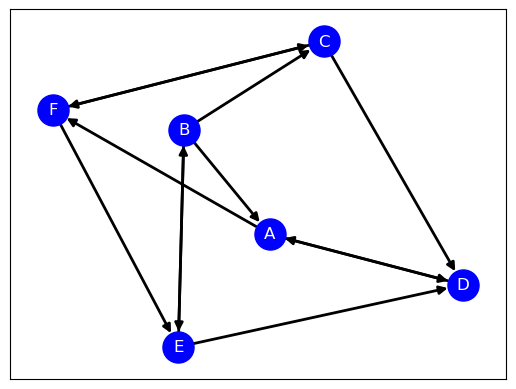

In [96]:
G1 = nx.DiGraph()
G1.add_nodes_from(list('ABCDEF'))
G1.add_edges_from([('A','D'),
                   ('A','F'),
                   ('B','A'),
                   ('B','C'),
                   ('B','E'),
                   ('C','D'),
                   ('C','F'),
                   ('D','A'),
                   ('E','B'),
                   ('F','C'),
                   ('E','D'),
                   ('F','E'),
                  ])
describe_graph(G1)

There are 8 cycles being detected and 3 of them are lenth 4 from A:

    ['A', 'F', 'E', 'D']

    ['A', 'F', 'E', 'B']

    ['A', 'F', 'C', 'D']